In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating new project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders

In [3]:
using Plots

In [4]:
r_min::Float64=0.0;
r_max::Float64=50.0;
Z::Int64=2;
l::Int64=0;


In [5]:
#grid= Grids.uniform_grid(r_min, r_max, N);
grid= ses.Grids.exponential_grid(r_max, Z);
N::Int64=sizeof(grid)[1];


In [6]:


v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu; #+ v_angu;

In [15]:

E_max::Float64=-0.05;
E_min::Float64=-2.3;
E_N::Int64=100;
E_grid= Grids.uniform_grid(E_min, E_max, E_N);

In [16]:
E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.atom);
E_intervals

DomainError: DomainError with indx to close to ends for continuoity conditions
        to be checked:


In [14]:
bad_intervals

2-element Vector{Tuple{Float64, Float64}}:
 (-2.0136363636363637, -1.992929292929293)
 (-0.23282828282828283, -0.21212121212121215)

In [9]:
numb_solu::Int64= size(E_intervals)[1];
eigen_list::Vector{Float64}=zeros(numb_solu);
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu];

In [13]:
eigen_list

1-element Vector{Float64}:
 -0.500000442686828

In [11]:
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, grid,InitialConditions.atom);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

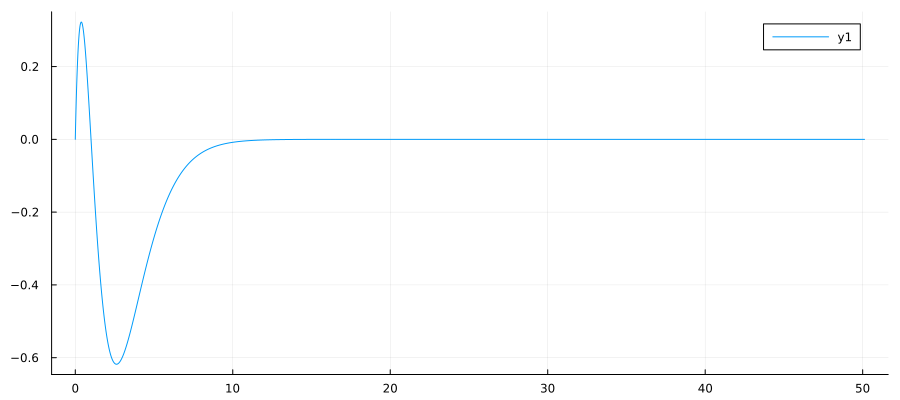

In [12]:
plot!(grid, u_wave_functions)
plot!(size=(900,400))